In [ ]:
#Name : Alexander Daniel Román Gabriel

In [ ]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error
import seaborn as sns

## READ THE DATA

In [ ]:
df = pd.read_excel('DataSet_Vehiculos_m.xlsx' , sheet_name= "Sheet1") #Sheet1 porque ahi estan los datos que queremos
df.head()

,Cylinder,Motor,Horsepower,Weight,Acel,Origen,MPG
0,8,5031,130,4.672,12,US,13
1,8,5735,165,4.924,12,US,16
2,8,5211,150,4.580,11,US,13
3,8,4982,150,4.576,12,US,15
4,8,4949,140,4.596,11,US,14


In [ ]:
df.columns

Index(['Cylinder', 'Motor', 'Horsepower', 'Weight', 'Acel', 'Origen', 'MPG'], dtype='object')

## DATA ANALYSIS

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Cylinder    385 non-null    int64  
 1   Motor       385 non-null    int64  
 2   Horsepower  385 non-null    int64  
 3   Weight      385 non-null    float64
 4   Acel        385 non-null    int64  
 5   Origen      385 non-null    object 
 6   MPG         385 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 21.2+ KB


In [ ]:
df.describe()

,Cylinder,Motor,Horsepower,Weight,Acel,MPG
count,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000
mean,5.490909,3206.371429,104.428571,3.490799,15.683117,11.238961
std,1.698819,1714.145914,38.500145,1.336290,2.769505,3.911127
min,4.000000,1114.000000,46.000000,1.718400,8.000000,5.000000
25%,4.000000,1721.000000,75.000000,2.374400,14.000000,8.000000
50%,4.000000,2474.000000,92.000000,3.056000,16.000000,10.000000
75%,8.000000,4949.000000,129.000000,4.532000,17.000000,14.000000
max,8.000000,7456.000000,230.000000,6.852000,25.000000,24.000000


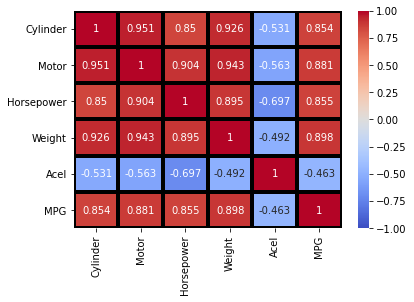

In [ ]:
#Correlation
sns.heatmap(df.corr() , annot = True , fmt = '.3g' , vmin = -1 , vmax = 1 , cmap = 'coolwarm' ,
            linewidths=3, linecolor='black')

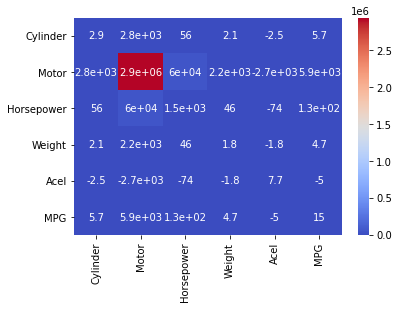

In [ ]:
#Covariance
sns.heatmap(df.cov() , annot = True , fmt = '.2g' , cmap = 'coolwarm')

## USING LINEAR REGRESSION

In [ ]:
#Create linear regression model called "regression"
regression = LinearRegression()

In [ ]:
#I don't want Origen column  . Then , I going to erase it
df.drop('Origen', axis = 1)

,Cylinder,Motor,Horsepower,Weight,Acel,MPG
0,8,5031,130,4.6720,12,13
1,8,5735,165,4.9240,12,16
2,8,5211,150,4.5800,11,13
3,8,4982,150,4.5760,12,15
4,8,4949,140,4.5960,11,14
...,...,...,...,...,...,...
380,4,2294,86,2.9760,16,9
381,4,1590,52,2.2720,25,5
382,4,2212,84,2.4480,12,7
383,4,1966,79,2.8000,19,8


In [ ]:
#Select your variables --> x : features variables , y : target variable
x = df[['Cylinder', 'Motor', 'Horsepower', 'Weight', 'Acel']]
y = df['MPG']

In [ ]:
#Train the model
regression.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
mpg_predict = regression.predict(x)

In [ ]:
#mpg into dataframe "df"
df['MPG PREDICT'] = mpg_predict
df.head() #check it

,Cylinder,Motor,Horsepower,Weight,Acel,Origen,MPG,MPG PREDICT
0,8,5031,130,4.672,12,US,13,14.090899
1,8,5735,165,4.924,12,US,16,15.937399
2,8,5211,150,4.580,11,US,13,14.603516
3,8,4982,150,4.576,12,US,15,14.676417
4,8,4949,140,4.596,11,US,14,14.154142


In [ ]:
#MAE
mae = mean_absolute_error(y , mpg_predict)
mae

1.2400143235756718

In [ ]:
#MSE
mse = mean_squared_error(y , mpg_predict)
mse

2.605596479128907

In [ ]:
rmse = mse ** 0.5
rmse

1.6141860113162012

## STATISTICAL SUMMARY

In [ ]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(x)
est = sm.OLS(y, X2)

est2 = est.fit()
print(est2.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     368.1
Date:                Tue, 29 Jun 2021   Prob (F-statistic):          5.27e-143
Time:                        23:38:32   Log-Likelihood:                -730.64
No. Observations:                 385   AIC:                             1473.
Df Residuals:                     379   BIC:                             1497.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5832      1.115     -1.420      0.1

P-VALUE of the variables is " P > |t| "